In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

[nltk_data] Downloading package stopwords to /home/smv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
def make_resume(text):
    resume = re.sub('[^a-zA-Z]', ' ', text)
    resume = resume.lower()
    resume = resume.split()
    ps = PorterStemmer()
    resume = [ps.stem(word) for word in resume if not word in set(stopwords.words('english'))]
    resume = ' '.join(resume)
    return resume


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  40 non-null     object
 1   Resume    40 non-null     object
dtypes: object(2)
memory usage: 772.0+ bytes


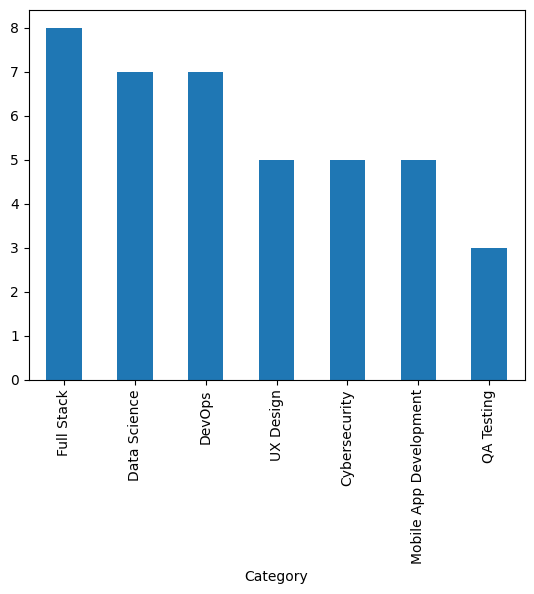

In [33]:
#load the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()
df.info()

df['Category'].value_counts()
df['Category'].value_counts().plot(kind='bar')
plt.show()

corpus = []
for i in range(0, len(df)):
    corpus.append(make_resume(df['Resume'][i]))
    
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#Classification Report
report = classification_report(y_test, y_pred)
print(report)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 3 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]
1.0
                        precision    recall  f1-score   support

         Cybersecurity       1.00      1.00      1.00         1
          Data Science       1.00      1.00      1.00         1
                DevOps       1.00      1.00      1.00         3
            Full Stack       1.00      1.00      1.00         2
Mobile App Development       1.00      1.00      1.00         1

              accuracy                           1.00         8
             macro avg       1.00      1.00      1.00         8
          weighted avg       1.00      1.00      1.00         8



In [38]:
text = """
Name: Veronica Vortex

Contact Information:
Email: veronica.vortex@example.com
Phone: +1 (555) 123-4567
LinkedIn: linkedin.com/in/veronicavortex

Professional Summary:
Highly motivated and detail-oriented QA Tester with a passion for ensuring product quality and user satisfaction. Skilled in manual and automated testing methodologies, with a knack for uncovering elusive bugs and glitches. Adept at collaborating with cross-functional teams to deliver innovative solutions.

Experience:
Quality Assurance Engineer - Galactic Technologies (2018-Present)
- Conducted rigorous testing on spacecraft navigation software, ensuring flawless performance in high-stakes interstellar missions.
- Developed automated testing scripts using alien technology, significantly reducing testing time and improving accuracy.
- Investigated mysterious anomalies in spacecraft telemetry data, contributing to the discovery of a previously unknown celestial phenomenon.

Education:
Bachelor of Science in Astrophysics - Space Academy (2014-2018)
- Explored the mysteries of the cosmos and gained expertise in celestial mechanics, astrophysical phenomena, and extraterrestrial communication protocols.
- Completed a research project on the potential use of wormholes for intergalactic travel, earning accolades from renowned space scientists.

Skills:
- Manual Testing: Proficient in conducting exhaustive manual testing on various software applications, including web and mobile platforms.
- Automated Testing: Skilled in using state-of-the-art testing tools and frameworks, such as Selenium, to automate testing processes.
- Bug Tracking: Experienced in identifying, documenting, and tracking software defects using bug tracking systems like Jira and Bugzilla.
- Interstellar Communication: Fluent in multiple alien languages and proficient in communicating with extraterrestrial life forms.
- Time Travel: Capable of navigating the space-time continuum to debug software issues in different temporal dimensions.

Certifications:
- Certified Warp Drive Technician: Completed intensive training in warp field theory and maintenance of warp propulsion systems.
- Intergalactic Quality Assurance Specialist: Certified by the Universal Quality Control Consortium for excellence in interstellar quality assurance practices.

Additional Interests:
In my spare time, I enjoy stargazing, astrophotography, and participating in zero-gravity yoga sessions aboard the International Space Station.

References:
Available upon request.

"Testing the limits of reality, one bug at a time."
"""

In [39]:
resume = cv.transform([make_resume(text)]).toarray()
classifier.predict(resume)

array(['QA Testing'], dtype=object)